# Analiza Sentiment leksikona -ADA + NB



In [1]:

import pandas as pd

In [2]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [3]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a2.csv",  index_col=0)

In [4]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [5]:
sent_an

,ID,POS,NEG,Lemme,Definicija,Vrsta,OBJ
0,ENG30-03574555-n,0.0,0.0,ustanova,zgrada u kojoj se nalazi organizaciona jedinic...,n,1.0
1,ENG30-07810907-n,0.0,0.0,začin,pripremljeni dodatak jelu za poboljšanje ukusa,n,1.0
2,ENG30-00721431-n,0.0,0.0,mesto,"u nečijim prilikama, mogućnostima",n,1.0
3,ENG30-00473799-v,0.0,0.0,"obnoviti,doterati,uglancati,uljuditi",Ostalo je još samo da se doteraju neke finese ...,v,1.0
4,ENG30-00903385-v,0.0,0.0,oprostiti,Zapad mu je oprostio što se nekada računao u S...,v,1.0
...,...,...,...,...,...,...,...
25315,ENG30-15266265-n,0.0,0.0,mandat,mandat predsednika,n,1.0
25316,ENG30-15266685-n,0.0,0.0,sredina,vreme između početka i kraja vremenskog perioda,n,1.0
25317,ENG30-15266911-n,0.0,0.0,"gotovo,konac,kraj,prestanak,svršetak,završetak",tačka u vremenu kada se nešto završava,n,1.0
25318,ENG30-15276642-n,0.0,0.0,"b/s,bitova u sekundi",(računarstvo) brzina prenosa podataka (npr. ko...,n,1.0


In [6]:
pd.set_option('display.max_rows', None)

## Statistike

Raspored reči prema pozitivnom polaritetu 

In [7]:
sent_an["POS"].value_counts()

0.000    23795
0.125      788
0.250      325
0.375      159
0.500      119
0.625       46
0.750       44
1.000       30
0.875       14
Name: POS, dtype: int64

In [8]:
sent_an[sent_an["POS"]>.9]["Lemme"]

701                                     poštovanje,respekt
1759                                    intelektualan,uman
3262                        narav,temperament,temperamenat
3729                                              ugodnost
4976                              celovitost,jedinstvenost
5352                          veličanstvenost,briljantnost
5378                                            pravoveran
6122                                              vrednost
7130                              atraktivnost,privlačnost
8714                                      redovni profesor
8922                    gorka čokolada,čokolada za kuvanje
9707                                  oslobađajuća presuda
12810                                              pobožan
17094                                          odobravanje
17107                                             posvećen
17133                                           izvanredan
17150                                              ushić

Raspored reči prema negativnom polaritetu 

In [9]:
sent_an["NEG"].value_counts()

0.000    23541
0.125      847
0.250      310
0.375      208
0.500      175
0.750       80
1.000       62
0.625       57
0.875       40
Name: NEG, dtype: int64

In [10]:
sent_an[sent_an["NEG"]>.9]["Lemme"]

37                    oplakati,tugovati,jadikovati,ožaliti
541                                      ubeđenje,uverenje
650                                                  rizik
1050                                          stid,sramota
2041                                          pogoršati se
2695                                       greška,pogreška
2726                                              nesrećan
2727                                          žaljenje,žal
2730                                  teskoba,uznemirenost
2826                                             rasturiti
2942                         likvidirati,ucmekati,skembati
3364                                        povreda,ozleda
3533                                strah,strahota,bojazan
4779                                    teroristički napad
4957                                              opasnost
5856                                         užasan,grozan
6627                                       neemocionalno

Raspored reči prema objektivnosti 

In [11]:
sent_an["OBJ"].value_counts()

1.000    22467
0.875     1008
0.750      672
0.625      443
0.500      313
0.250      134
0.375      128
0.000       93
0.125       62
Name: OBJ, dtype: int64

In [12]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<AxesSubplot: title={'center': 'POS'}>,
        <AxesSubplot: title={'center': 'NEG'}>],
       [<AxesSubplot: title={'center': 'OBJ'}>, <AxesSubplot: >]],
      dtype=object)

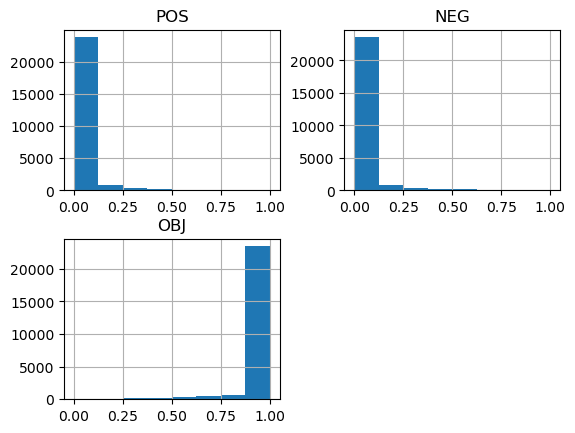

In [13]:
sent_an.hist(bins=8)

<AxesSubplot: >

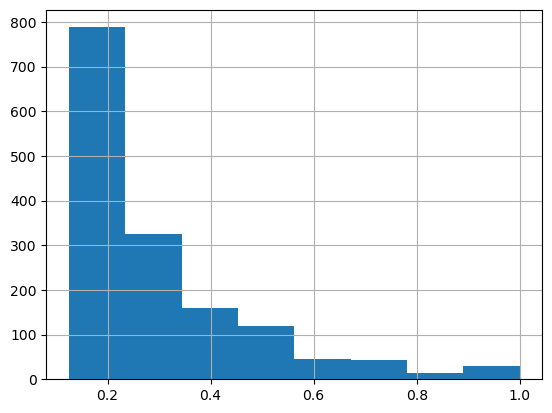

In [14]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<AxesSubplot: >

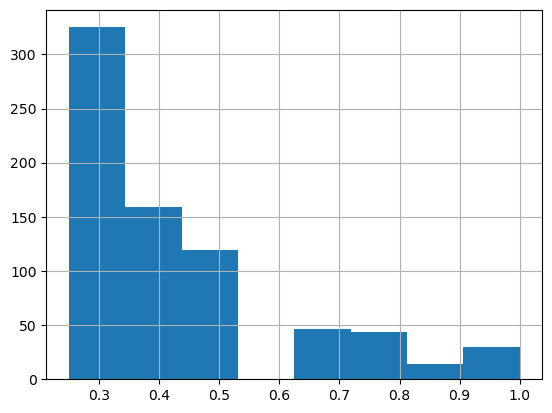

In [15]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<AxesSubplot: >

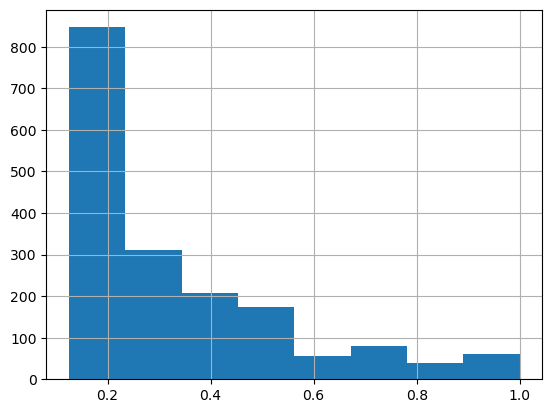

In [16]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<AxesSubplot: >

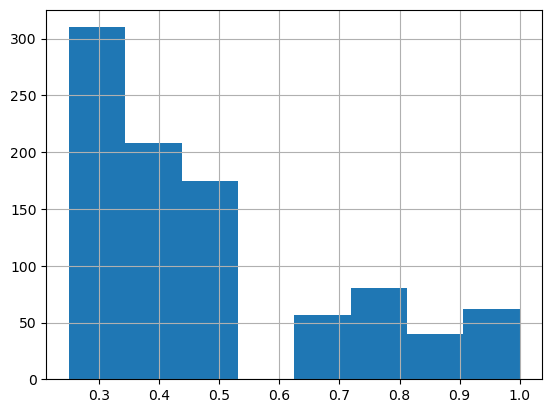

In [17]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [18]:
sent_an["Vrsta"].value_counts(sort=True)

n    20080
v     2896
a     2202
b      142
Name: Vrsta, dtype: int64

<AxesSubplot: ylabel='Vrsta'>

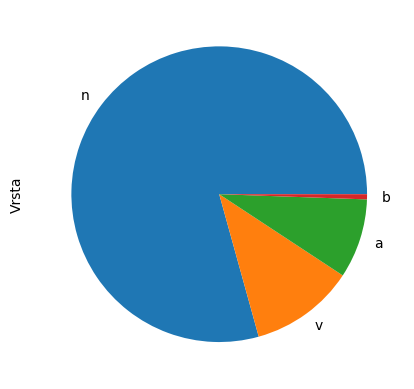

In [19]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'n'}>,
        <AxesSubplot: title={'center': 'v'}>]], dtype=object)

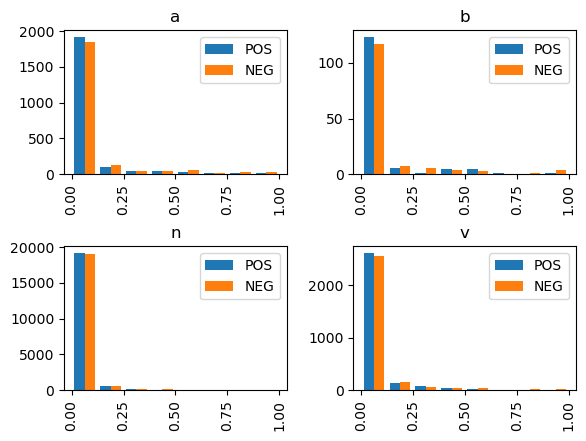

In [20]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'n'}>,
        <AxesSubplot: title={'center': 'v'}>]], dtype=object)

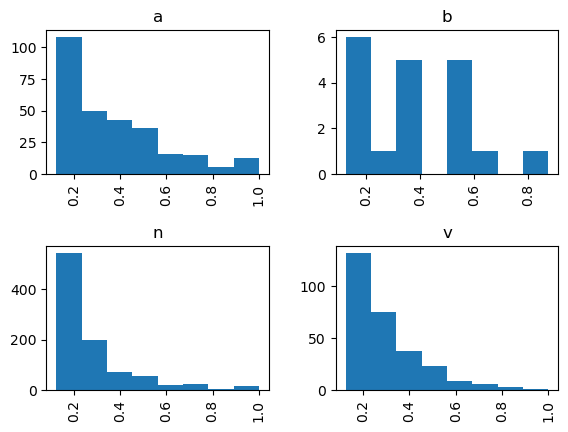

In [21]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'n'}>,
        <AxesSubplot: title={'center': 'v'}>]], dtype=object)

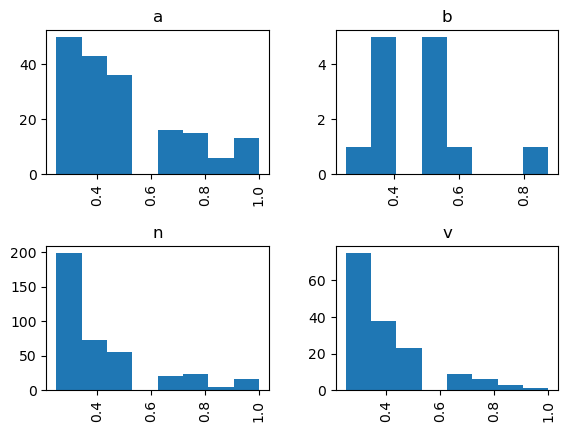

In [22]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'n'}>,
        <AxesSubplot: title={'center': 'v'}>]], dtype=object)

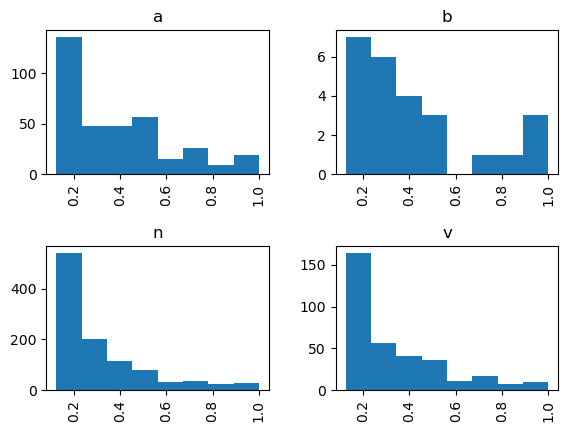

In [23]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'n'}>,
        <AxesSubplot: title={'center': 'v'}>]], dtype=object)

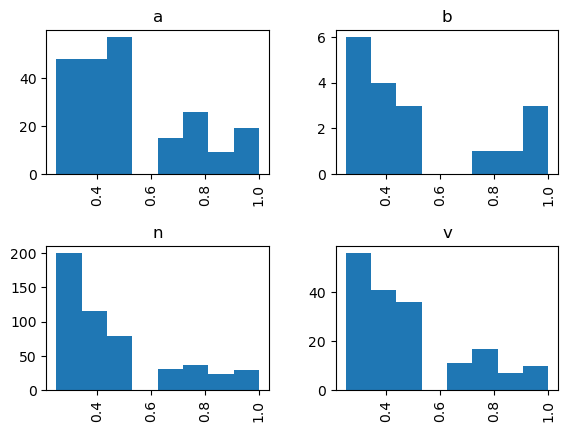

In [24]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

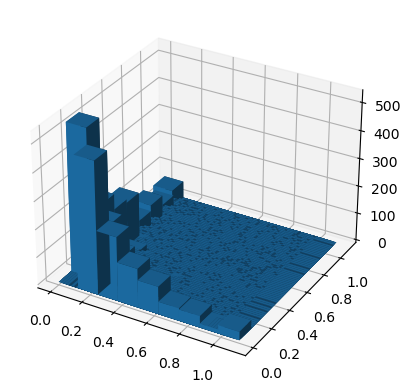

In [25]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<AxesSubplot: >

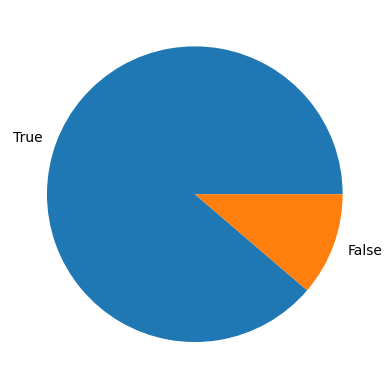

In [26]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

<AxesSubplot: >

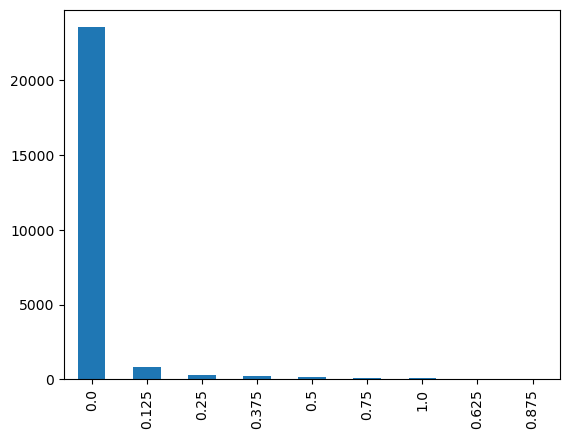

In [27]:
sent_an["NEG"].value_counts().plot(kind = "bar")

<AxesSubplot: >

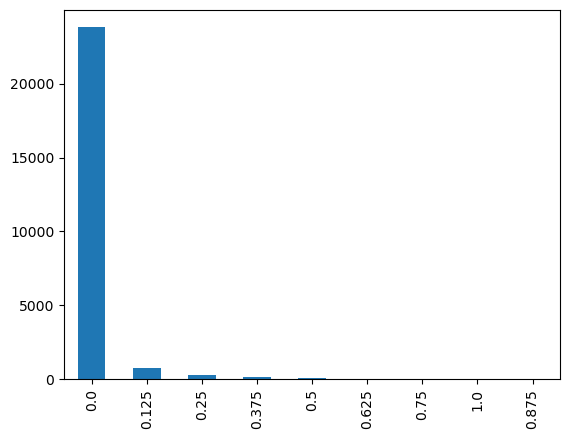

In [28]:
sent_an["POS"].value_counts().plot(kind = "bar")

In [29]:
a = sent_an[["POS","NEG"]].value_counts(sort=True)

<AxesSubplot: >

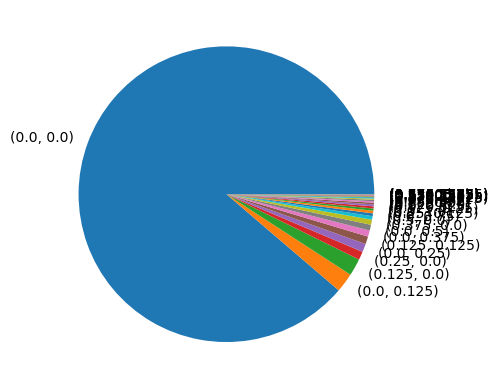

In [30]:
a.plot(kind ="pie")

In [31]:
sent_an["Vrsta"].value_counts()

n    20080
v     2896
a     2202
b      142
Name: Vrsta, dtype: int64

<AxesSubplot: title={'center': 'imenice-negativno'}>

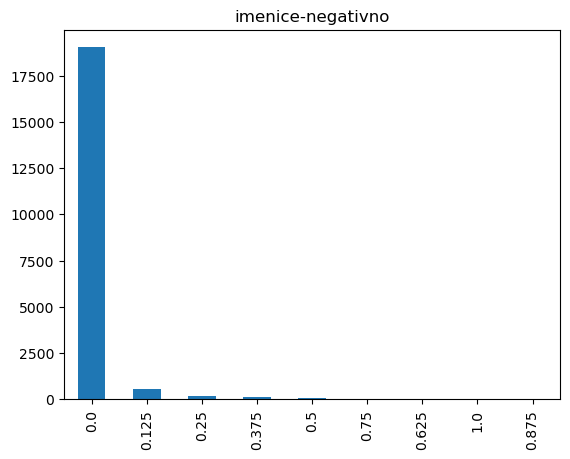

In [32]:
sent_an[sent_an["Vrsta"] == 'n']["NEG"].value_counts().plot(kind = "bar", title = "imenice-negativno")

<AxesSubplot: title={'center': 'imenica-positivno'}>

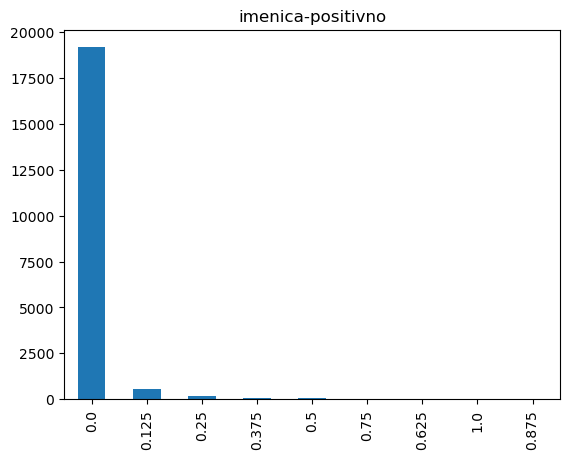

In [33]:
sent_an[sent_an["Vrsta"] == 'n']["POS"].value_counts().plot(kind = "bar", title = "imenica-positivno")

<AxesSubplot: title={'center': 'glagol-negativno'}>

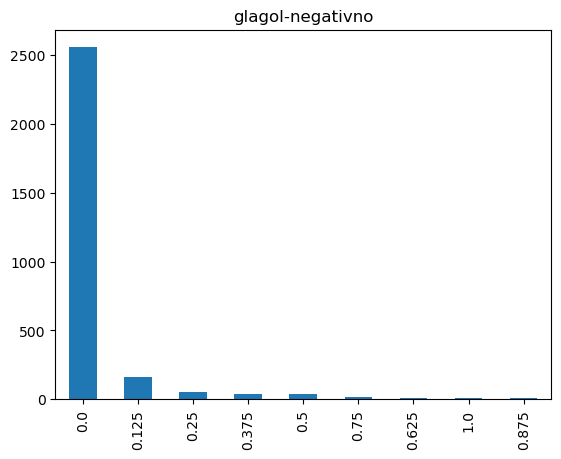

In [34]:
sent_an[sent_an["Vrsta"] == 'v']["NEG"].value_counts().plot(kind = "bar", title = "glagol-negativno")

<AxesSubplot: title={'center': 'glagol-positivno'}>

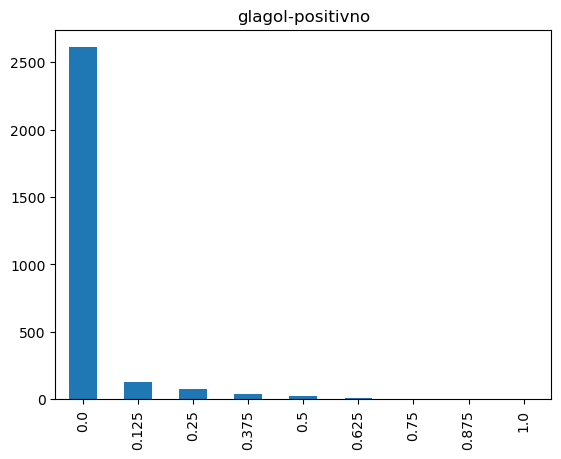

In [35]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "glagol-positivno")

<AxesSubplot: title={'center': 'pridev-negativno'}>

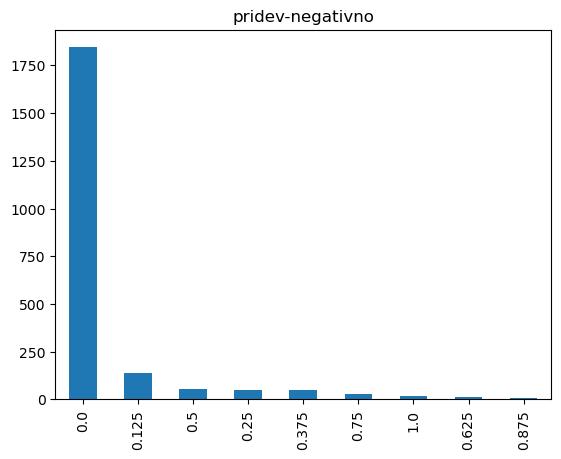

In [36]:
sent_an[sent_an["Vrsta"] == 'a']["NEG"].value_counts().plot(kind = "bar", title = "pridev-negativno")

<AxesSubplot: title={'center': 'pridev-positivno'}>

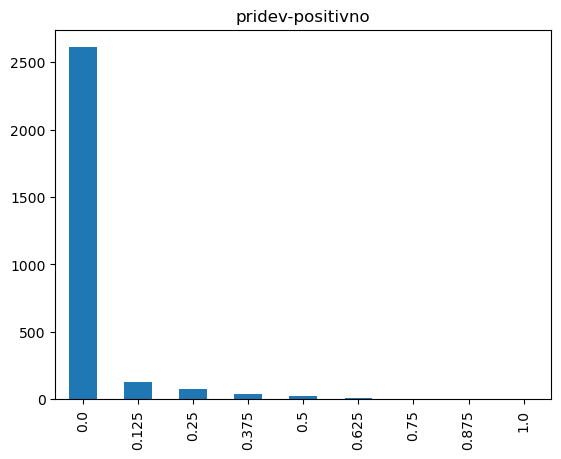

In [37]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "pridev-positivno")

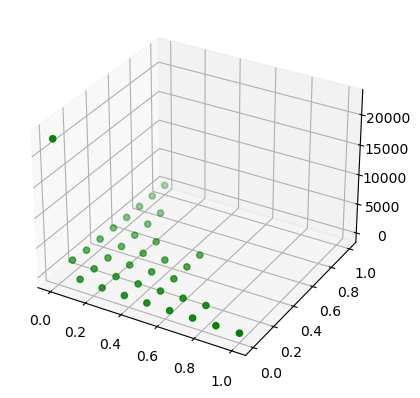

In [38]:

fig = plt.figure()
b =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')


In [39]:
a = sent_an[["POS","NEG", "Vrsta"]].value_counts(sort=True)
a

POS    NEG    Vrsta
0.000  0.000  n        18393
              v         2339
              a         1632
       0.125  n          332
0.125  0.000  n          330
       0.125  n          146
0.000  0.250  n          144
0.250  0.000  n          141
0.000  0.125  v          117
       0.000  b          103
       0.375  n           90
       0.125  a           81
0.125  0.000  v           80
0.000  0.500  n           73
0.125  0.000  a           63
0.375  0.000  n           60
0.250  0.000  v           56
0.000  0.500  a           52
0.250  0.125  n           45
0.000  0.375  a           43
       0.250  v           41
0.500  0.000  n           41
0.125  0.250  n           38
0.000  0.250  a           38
0.375  0.000  v           38
              a           37
0.000  0.375  v           36
       0.750  n           34
0.125  0.125  v           33
0.250  0.000  a           33
0.000  0.500  v           32
0.500  0.000  a           31
0.125  0.125  a           31
0.000  1.000  n        

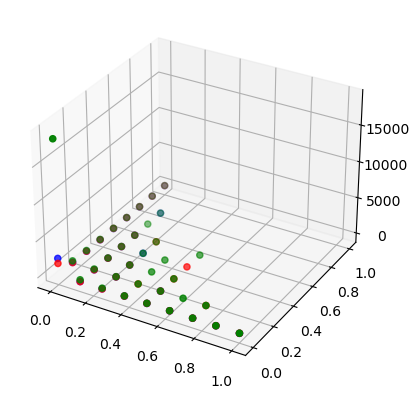

In [40]:
fig = plt.figure()
c =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')

b =c [c["Vrsta"]=="n"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')
b =c [c["Vrsta"]=="v"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='blue')
b =c [c["Vrsta"]=="a"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='red')



In [41]:
# srbsentiwordnet2.csv
# srbsentiwordnet_a2.csv